# Plot dataset metrics

Plot number of cells per sample, MT, nUMI, nGene plots for each dataset.

In [1]:
suppressPackageStartupMessages({
    library(ggplot2)
    library(ggpubr)
    library(tidyr)
    library(dplyr)
    library(plyr)
    library(Matrix)
    library(vcfR)
    library(lme4)
    library(Matrix.utils)
    library(singlecellmethods)
    library(MASS)
    library(glmnet)
    library(patchwork)
    library(stringr)
    library(purrr)
    library(fitdistrplus)
    library(gridExtra)
    require(gdata)
    library(readxl)
})

fig.size <- function (height, width) {
    options(repr.plot.height = height, repr.plot.width = width, repr.plot.res = 200)
}

source('../scripts/utils.R')

In [5]:
prefix = '/data/srlab1/jkang/hla2023/data/meta/'
AMP2RA_meta = read.csv(paste0(prefix, 'cell_meta_AMP2RA_completeHLA_cellQC.csv'), row.names = 1)
AMP2RA_meta$X = NULL
Smillie_meta = read.csv(paste0(prefix, 'cell_meta_Smillie_completeHLA_cellQC.csv'), row.names = 1)
Randolph_meta = read.csv(paste0(prefix, 'cell_meta_Randolph_completeHLA_cellQC.csv'), row.names = 1)
OneK1K_meta = read.csv(paste0(prefix, 'cell_meta_OneK1K_completeHLA_cellQC.csv'), row.names = 1)
OneK1K_meta$X = NULL

meta_combined = rbind(AMP2RA_meta, Smillie_meta, Randolph_meta, OneK1K_meta)
meta_combined$pMT = meta_combined$percent.mito * 100
meta_combined$dataset = revalue(meta_combined$dataset, old_new_dataset_names)
meta_combined$dataset = factor(meta_combined$dataset, levels = c('Synovium', 'Intestine', 'PBMC-cultured', 'PBMC-blood'))

sumstats = meta_combined %>% group_by(dataset) %>% 
                          dplyr::summarise(meanUMI = mean(nUMI),
                                           maxUMI = max(nUMI),
                                           sdUMI = sd(nUMI),
                                           meanGene = mean(nGene),
                                           maxGene = max(nGene),
                                           minGene = min(nGene),
                                           sdGene = sd(nGene),
                                           meanpMT = mean(pMT),
                                           maxpMT = max(pMT),
                                           sdpMT = sd(pMT),
                                           n = n())
sumstats$dataset = factor(sumstats$dataset, levels = c('Synovium', 'Intestine', 'PBMC-cultured', 'PBMC-blood'))
levels(meta_combined$dataset)
addmargins(table(meta_combined$dataset, meta_combined$cell_type_major))

The following `from` values were not present in `x`: Smillie, Randolph_NI, Randolph



[1] "Synovium"      "Intestine"     "PBMC-cultured" "PBMC-blood"

,B_plasma,Endothelial,Epithelial,Fibroblast,Myeloid,NK,Other,T,Sum
Synovium,25919,23201,0,69253,66789,7766,2886,82423,278237
Intestine,56572,3101,77489,13405,14492,1883,4165,47868,218975
PBMC-cultured,17662,0,0,0,23241,11085,345,136519,188852
PBMC-blood,80784,0,0,0,40711,105150,6904,538579,772128
Sum,180937,26302,77489,82658,145233,125884,14300,805389,1458192


## Plot dataset metrics after QC

png 
  2

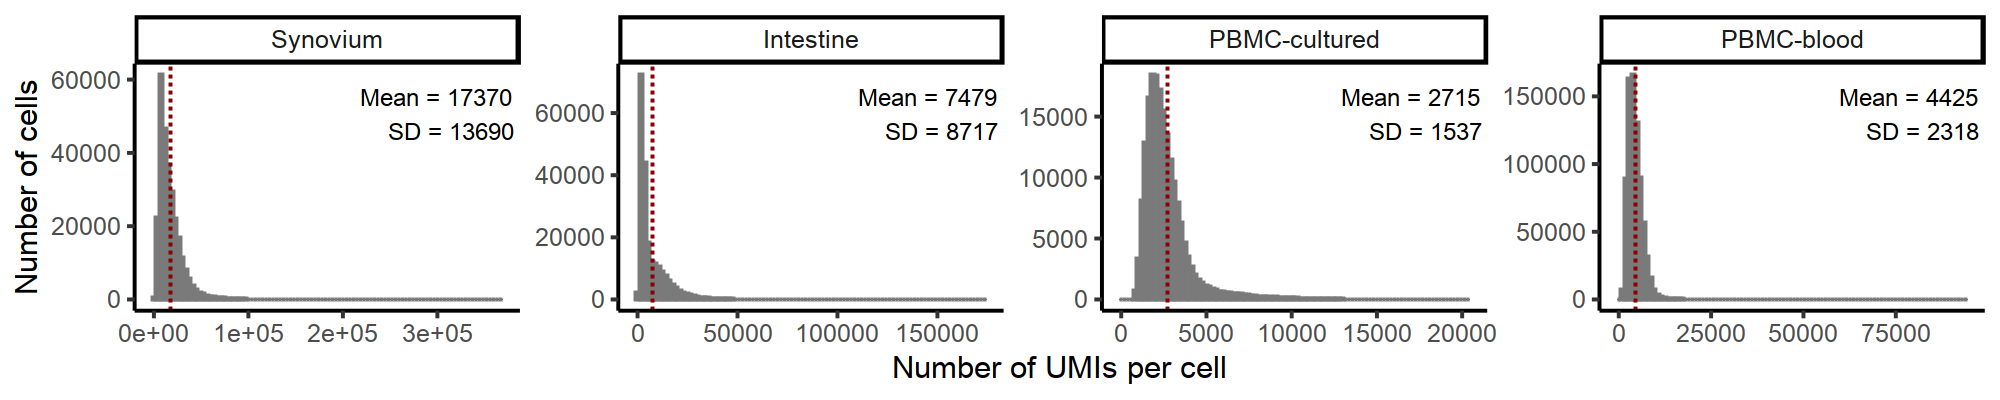

In [6]:
fig.size(2, 10)
png(file = '../SuppFigs/Dataset_metrics_nUMI.png', width = 10, height = 2, res= 300, units = 'in')
p = ggplot(meta_combined) +
    geom_histogram(aes(x = nUMI), bins = 100, col = 'grey48') +
    theme_classic() + facet_wrap(~ dataset, scales = 'free', ncol = 4) +
    geom_vline(data = sumstats, aes(xintercept = meanUMI), linetype = 'dashed', col = 'darkred', size=.5) +
    geom_text(size  = 3, data = sumstats,
            mapping = aes(x = Inf, y = Inf, label = paste0('Mean = ', round(meanUMI), '\nSD = ', round(sdUMI))),
            hjust   = 1.05, vjust   = 1.5) +
    ylab('Number of cells') + xlab('Number of UMIs per cell') + expand_limits(x = 0)
print(p)
dev.off()
p

png 
  2

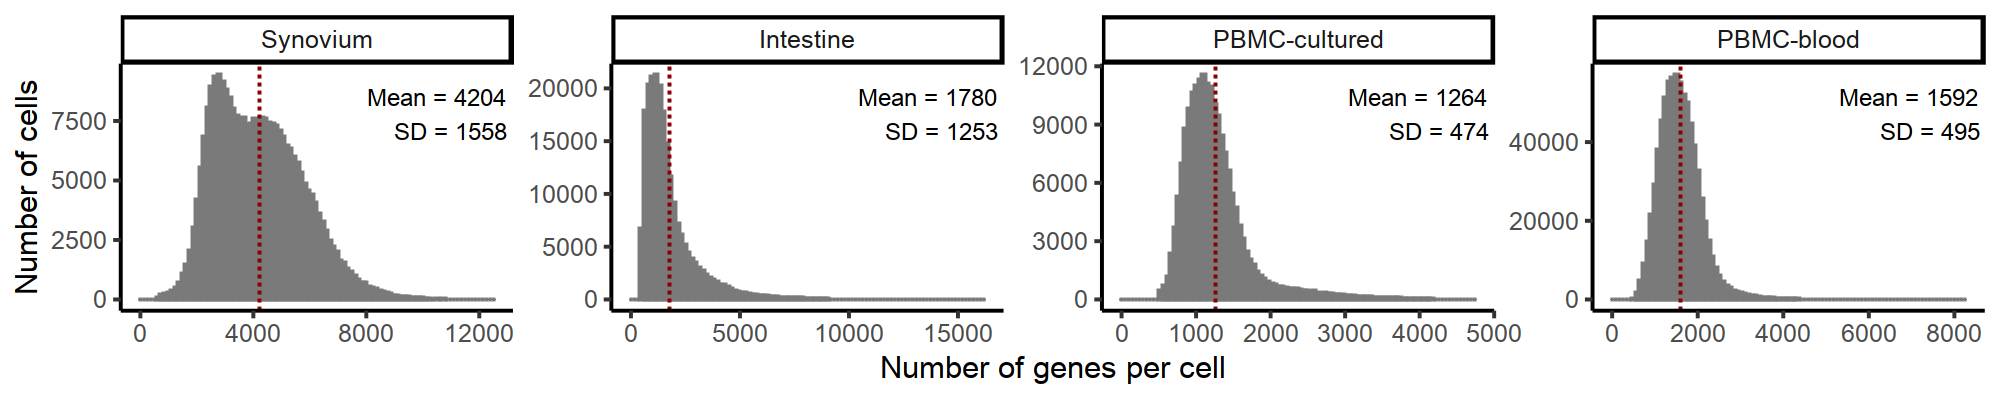

In [7]:
fig.size(2, 10)
png(file = '../SuppFigs/Dataset_metrics_nGene.png', width = 10, height = 2, res= 300, units = 'in')
p = ggplot(meta_combined) +
    geom_histogram(aes(x = nGene), bins = 100, col = 'grey48') +
    theme_classic() + facet_wrap(~ dataset, scales = 'free', ncol = 5) +
    geom_vline(data = sumstats, aes(xintercept = meanGene), linetype = 'dashed', col = 'darkred', size=.5) +
    geom_text(size  = 3, data = sumstats,
            mapping = aes(x = Inf, y = Inf, label = paste0('Mean = ', round(meanGene), '\nSD = ', round(sdGene))),
            hjust   = 1.05, vjust   = 1.5) +
    ylab('Number of cells') + xlab('Number of genes per cell') + expand_limits(x = 0)
print(p)
dev.off()
p

png 
  2

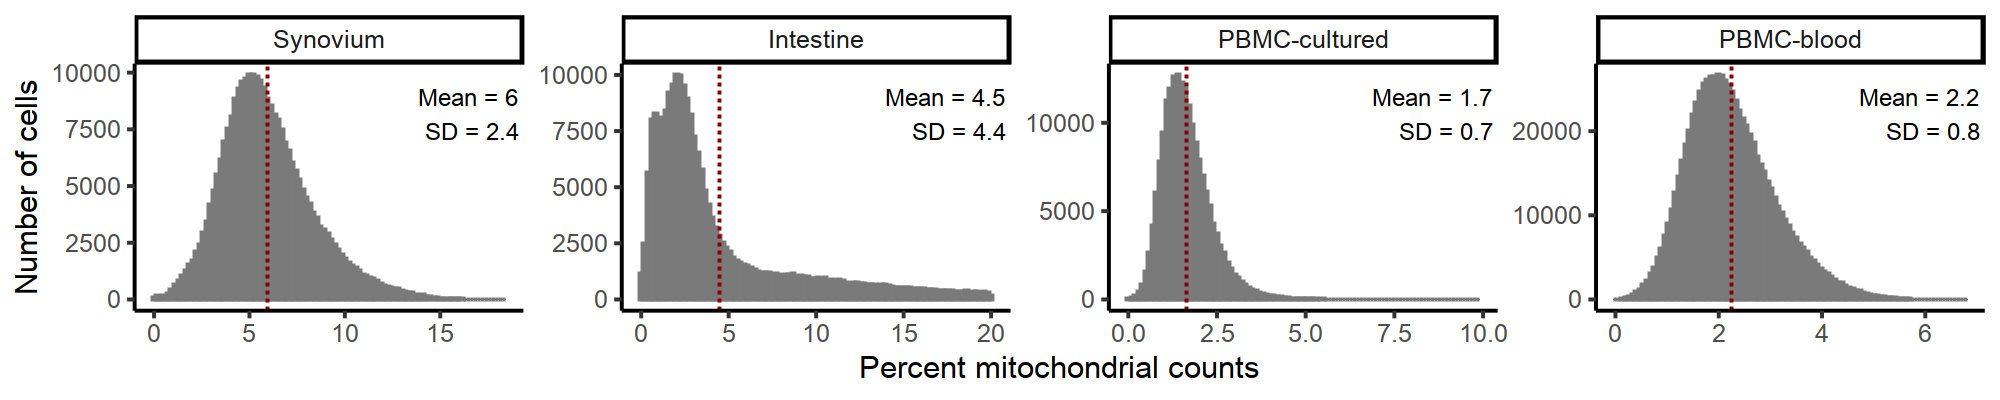

In [8]:
fig.size(2, 10)
png(file = '../SuppFigs/Dataset_metrics_pmito.png', width = 10, height = 2, res= 300, units = 'in')
p = ggplot(meta_combined) +
    geom_histogram(aes(x = pMT), bins = 100, col = 'grey48') +
    theme_classic() + facet_wrap(~ dataset, scales = 'free', ncol = 5) +
    geom_vline(data = sumstats, aes(xintercept = meanpMT), linetype = 'dashed', col = 'darkred', size=.5) +
    geom_text(size  = 3, data = sumstats,
            mapping = aes(x = Inf, y = Inf, label = paste0('Mean = ', round(meanpMT, 1), '\nSD = ', round(sdpMT, 1))),
            hjust   = 1.05, vjust   = 1.5) +
    ylab('Number of cells') + xlab('Percent mitochondrial counts') + expand_limits(x = 0)
print(p)
dev.off()
p

## Plot cell type composition

Plot number of cells per sample (removing samples with fewer than 5 cells of the cell type)

In [9]:
cells_per_sample = meta_combined %>% dplyr::group_by(cell_type_major, Sample, dataset) %>% 
                                     dplyr::summarise(n = n()) %>% filter(cell_type_major != 'Other')
cells_per_sample$n %>% min()
cells_per_sample = cells_per_sample %>% filter(n >= 5) %>% as.data.frame()
cells_per_sample$n %>% min()
cells_per_sample$dataset = factor(cells_per_sample$dataset, 
                                  levels = rev(c('Synovium', 'Intestine', 'PBMC-cultured', 'PBMC-blood')))
# Rename because B includes plasma
cells_per_sample$cell_type_major = ifelse(cells_per_sample$cell_type_major == 'B_plasma', 'B', cells_per_sample$cell_type_major)
cells_per_sample$cell_type_major = factor(cells_per_sample$cell_type_major, 
                                          levels = c('Myeloid', 'B', 'T', 'NK', 'Endothelial', 'Fibroblast', 'Epithelial'))

`summarise()` has grouped output by 'cell_type_major', 'Sample'. You can override using the `.groups` argument.


[1] 1

[1] 5

png 
  2

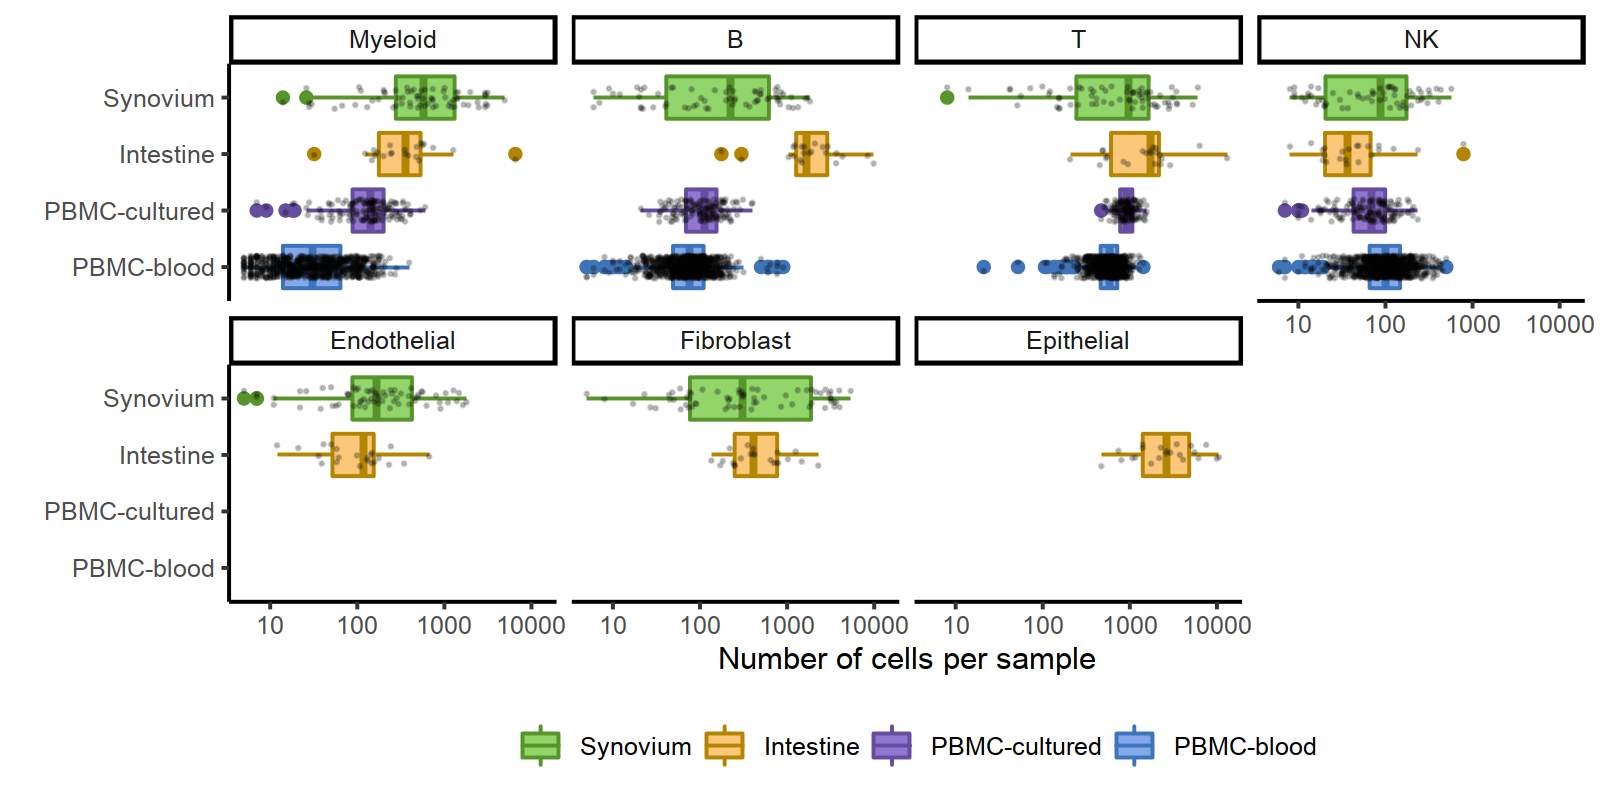

In [10]:
fig.size(4, 8)
png(file = '../SuppFigs/Dataset_metrics_cells_per_sample_all_cell_types.png', width = 8, height = 4, res= 300, units = 'in')
p = ggplot(cells_per_sample) +
    geom_boxplot(aes(x = dataset, y = n, col = dataset, fill = dataset)) +
    geom_jitter(aes(x = dataset, y = n), col = 'black', alpha = 0.2, size = .2, width = 0.2) +
    theme_classic() + facet_wrap(~cell_type_major, ncol = 4) + coord_flip() +
    scale_color_manual(values = cohort_colors_darker) + scale_fill_manual(values = cohort_colors) +
    xlab('') + ylab('Number of cells per sample') + labs(color = '', fill = '') + theme(legend.position = 'bottom') +
    scale_y_continuous(trans='log10')
print(p)
dev.off()
p

Subset to B, myeloid, T only

png 
  2

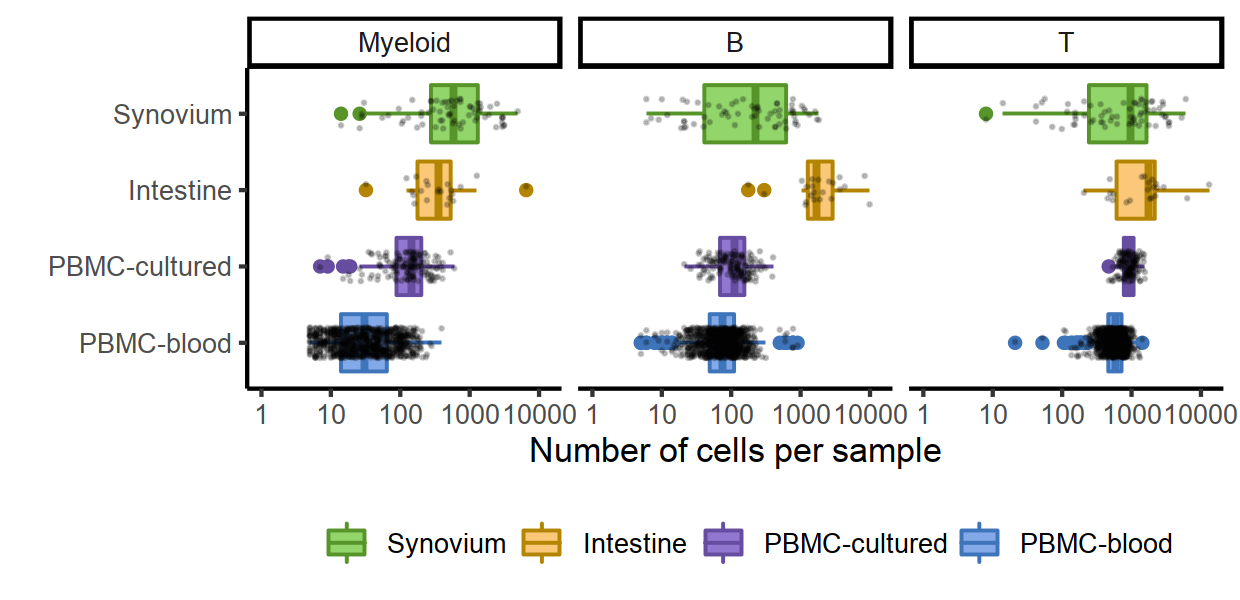

In [11]:
fig.size(3, 6.2)
png(file = '../SuppFigs/Dataset_metrics_cells_per_sample_BMT.png', width = 6.2, height = 3, res= 300, units = 'in')
p = cells_per_sample %>%
    filter(cell_type_major %in% c('B', 'Myeloid', 'T')) %>% 
    ggplot() +
        geom_boxplot(aes(x = dataset, y = n, col = dataset, fill = dataset)) +
        geom_jitter(aes(x = dataset, y = n), col = 'black', alpha = 0.2, size = .2, width = 0.2) +
        theme_classic(base_size = 12) + facet_wrap(~cell_type_major, ncol = 3) + coord_flip() +
        scale_color_manual(values = cohort_colors_darker) + scale_fill_manual(values = cohort_colors) +
        xlab('') + ylab('Number of cells per sample') + labs(color = '', fill = '') + theme(legend.position = 'bottom') +
        scale_y_continuous(trans='log10') + expand_limits(y = 1)
print(p)
dev.off()
p

## Plot PEER factor alphas

The following `from` values were not present in `x`: Smillie2019, Randolph2021, Randolph



png 
  2

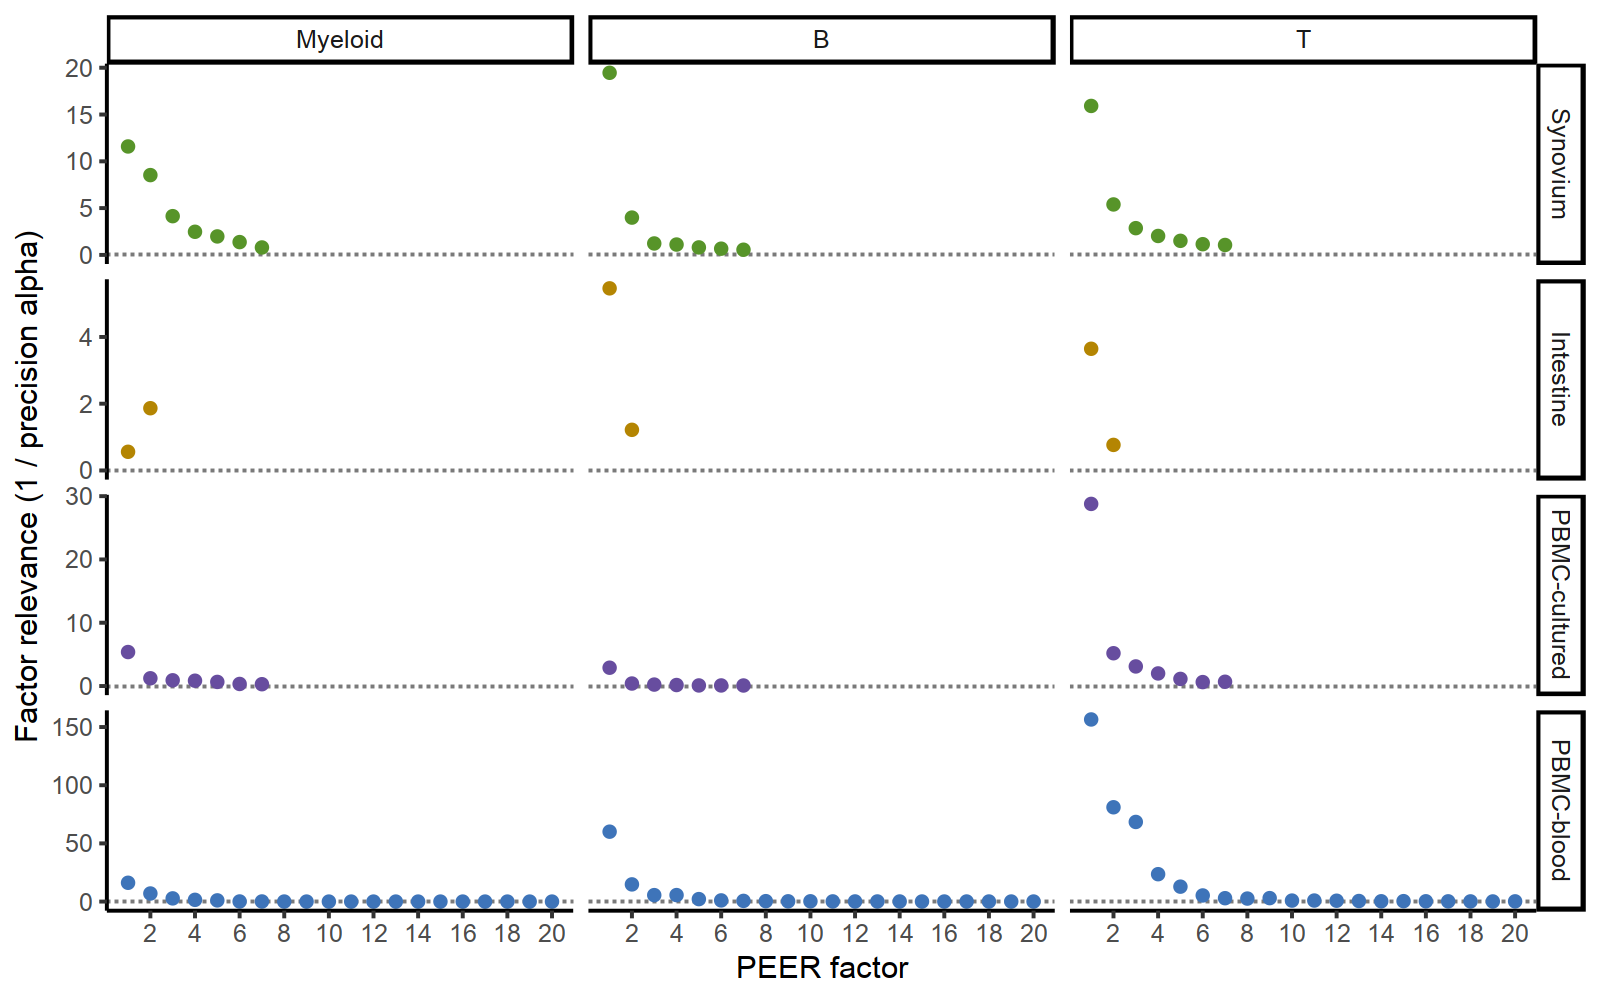

In [39]:
all_alphas = NULL
for (dataset in c('AMP2RA', 'Smillie', 'Randolph_NI', 'OneK1K')) {
    for (cell_type in c('B_plasma', 'Myeloid', 'T')) {
        
        if (dataset == 'OneK1K') {
            K = 20 
        } else if (dataset == 'Smillie') {
            K = 2
        } else { # AMP and Randolph
            K = 7
        }
        
        alphas = read.csv(paste0('./2_PEER/pers_', dataset, '_', cell_type, '_K', K, '_PEER_alpha.csv'))
        PEER_alphas = tail(alphas, K) # remove covariates
        a = as.data.frame(1 / PEER_alphas)
        a$X = NULL
        a$factor = 1:K
        a$dataset = dataset
        a$cell_type = cell_type
        all_alphas = rbind(all_alphas, a)
    }
}
all_alphas$dataset = revalue(all_alphas$dataset, old_new_dataset_names)
all_alphas$dataset = factor(all_alphas$dataset, levels = c('Synovium', 'Intestine', 'PBMC-cultured', 'PBMC-blood'))

# Rename because B includes plasma
all_alphas$cell_type = ifelse(all_alphas$cell_type == 'B_plasma', 'B', all_alphas$cell_type)
all_alphas$cell_type = factor(all_alphas$cell_type, levels = c('Myeloid', 'B', 'T'))

fig.size(5, 8)
pdf(file = '../SuppFigs/Dataset_PEER_alphas_K_variable.pdf', width = 8, height = 5)
p = ggplot(all_alphas) +
    geom_hline(aes(yintercept = 0), col = 'grey48', linetype = 'dashed') +
    geom_point(aes(x = factor, y = V1, col = dataset)) +
    theme_classic(base_size = 11) + facet_grid(dataset~cell_type, scales = 'free') + 
    scale_color_manual(values = cohort_colors_darker) + 
    scale_fill_manual(values = cohort_colors) +
    scale_x_continuous(n.breaks =11) +
    xlab('PEER factor') + ylab('Factor relevance (1 / precision alpha)') + labs(color = '') + 
    theme(legend.position = 'none')
print(p)
dev.off()
p

## Table of cell numbers

Before cell QC

In [30]:
cell_meta_AMP2RA = read.csv(paste0(prefix, 'cell_meta_AMP2RA_completeHLA.csv'), row.names = 1)
cell_meta_AMP2RA$X = NULL
cell_meta_Randolph = read.csv(paste0(prefix, 'cell_meta_Randolph_completeHLA.csv'), row.names = 1)
cell_meta_Smillie = read.csv(paste0(prefix, 'cell_meta_Smillie_completeHLA.csv'), row.names = 1)
cell_meta_OneK1K = read.csv(paste0(prefix, 'cell_meta_OneK1K_completeHLA.csv'), row.names = 1)

combined_cell_meta = rbind(cell_meta_AMP2RA, cell_meta_Smillie, cell_meta_Randolph, cell_meta_OneK1K)
head(combined_cell_meta, 3)
t_preCellQC = table(combined_cell_meta$cell_type_major, 
           factor(combined_cell_meta$dataset, levels = c('AMP2RA', 'Smillie2019', 'Randolph2021', 'OneK1K'))) %>% addmargins()
t_preCellQC

,Cell,Sample,cell_type_major,cell_type_fine,dataset
,<chr>,<chr>,<chr>,<chr>,<chr>
1,BRI-399_AAACGAACAGTCTGGC,BRI-399,B_plasma,B-2: IgM+IgD+TCL1A+ naive,AMP2RA
2,BRI-399_AAAGGATGTCTCAAGT,BRI-399,B_plasma,B-1: CD24++CD27+IgM+ unswitched memory,AMP2RA
3,BRI-399_AAAGTGACATCGAACT,BRI-399,B_plasma,B-2: IgM+IgD+TCL1A+ naive,AMP2RA


,AMP2RA,Smillie2019,Randolph2021,OneK1K,Sum
B_plasma,25919,70959,17715,80790,195383
Endothelial,23201,4064,0,0,27265
Epithelial,0,87785,0,0,87785
Fibroblast,69253,17524,0,0,86777
Myeloid,66789,17938,23316,40718,148761
NK,7766,2321,11119,105150,126356
Other,2886,5211,345,6926,15368
T,82423,59827,136993,538668,817911
Sum,278237,265629,189488,772252,1505606


After cell QC

In [31]:
cell_meta_AMP2RA = read.csv(paste0(prefix, 'cell_meta_AMP2RA_completeHLA_cellQC.csv'), row.names = 1)
cell_meta_AMP2RA$X = NULL
cell_meta_Randolph = read.csv(paste0(prefix, 'cell_meta_Randolph_completeHLA_cellQC.csv'), row.names = 1)
cell_meta_Smillie = read.csv(paste0(prefix, 'cell_meta_Smillie_completeHLA_cellQC.csv'), row.names = 1)
cell_meta_OneK1K = read.csv(paste0(prefix, 'cell_meta_OneK1K_completeHLA_cellQC.csv'), row.names = 1)

combined_cell_meta = rbind(cell_meta_AMP2RA, cell_meta_Smillie, cell_meta_Randolph, cell_meta_OneK1K)
head(combined_cell_meta, 3)

,Cell,Sample,cell_type_major,cell_type_fine,dataset,nUMI,percent.mito,nGene
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
1,BRI-399_AAACGAACAGTCTGGC,BRI-399,B_plasma,B-2: IgM+IgD+TCL1A+ naive,AMP2RA,7476,0.00882825,2924
2,BRI-399_AAAGGATGTCTCAAGT,BRI-399,B_plasma,B-1: CD24++CD27+IgM+ unswitched memory,AMP2RA,6570,0.06666667,2490
3,BRI-399_AAAGTGACATCGAACT,BRI-399,B_plasma,B-2: IgM+IgD+TCL1A+ naive,AMP2RA,5050,0.07623762,2006


In [32]:
# Remove Other and Epithelial cells
combined_cell_meta = combined_cell_meta %>% filter(! cell_type_major %in% c('Other', 'Epithelial'))
combined_cell_meta$cell_type_major = factor(combined_cell_meta$cell_type_major, 
                                            levels = c('Myeloid', 'B_plasma', 'T', 'NK', 'Fibroblast', 'Endothelial'))
dim(combined_cell_meta)

[1] 1366403       8

In [33]:
t_postCellQC = table(combined_cell_meta$cell_type_major, 
           factor(combined_cell_meta$dataset, levels = c('AMP2RA', 'Smillie2019', 'Randolph2021', 'OneK1K'))) %>% addmargins()
t_postCellQC
write.csv(t_postCellQC, '../SuppTables/cell_numbers_postHLAfiltering_postCellQC.csv', row.names = T, quote = F)

,AMP2RA,Smillie2019,Randolph2021,OneK1K,Sum
Myeloid,66789,14492,23241,40711,145233
B_plasma,25919,56572,17662,80784,180937
T,82423,47868,136519,538579,805389
NK,7766,1883,11085,105150,125884
Fibroblast,69253,13405,0,0,82658
Endothelial,23201,3101,0,0,26302
Sum,275351,137321,188507,765224,1366403


**After removing cells from individuals with fewer than 5 cells**

In [41]:
B_plasma_meta = readRDS('../symphony/AllCohorts_B_plasma_sample0.5batch0.5dataset0.5_reference.rds')$meta_data %>%
    mutate(cell_type_major = 'B') # B cells contain plasma cells
Myeloid_meta = readRDS('../symphony/AllCohorts_Myeloid_sample0.5batch0.5dataset0.5_reference.rds')$meta_data
T_meta = readRDS('../symphony/AllCohorts_T_sample0.5batch0.5dataset0.5_reference.rds')$meta_data
NK_meta = readRDS('../symphony/AllCohorts_NK_sample0.5batch0.5dataset0.5_reference.rds')$meta_data
Fibroblast_meta = readRDS('../symphony/AllCohorts_Fibroblast_sample0.5batch0.5dataset0.5_reference.rds')$meta_data
Endothelial_meta = readRDS('../symphony/AllCohorts_Endothelial_sample0.5batch0.5dataset0.5_reference.rds')$meta_data

combined_cell_meta_morethan5 = rbind(B_plasma_meta, Myeloid_meta, T_meta, NK_meta, Fibroblast_meta, Endothelial_meta)
combined_cell_meta_morethan5$cell_type_major = factor(combined_cell_meta_morethan5$cell_type_major, 
                                            levels = c('Myeloid', 'B', 'T', 'NK', 'Fibroblast', 'Endothelial'))

combined_cell_meta_morethan5$dataset = revalue(combined_cell_meta_morethan5$dataset, old_new_dataset_names)
combined_cell_meta_morethan5$dataset = factor(combined_cell_meta_morethan5$dataset, 
                                              levels = c('Synovium', 'Intestine', 'PBMC-cultured', 'PBMC-blood'))

t_postCellQC_morethan5 = table(combined_cell_meta_morethan5$cell_type_major, 
           factor(combined_cell_meta_morethan5$dataset, 
                  levels = c('Synovium', 'Intestine', 'PBMC-cultured', 'PBMC-blood'))) %>% addmargins()

write.csv(t_postCellQC_morethan5, '../SuppTables/cell_numbers_postHLAfiltering_postCellQC_morethan5.csv', 
          row.names = T, quote = F)

The following `from` values were not present in `x`: Smillie, Randolph_NI, Randolph2021



In [42]:
t_postCellQC_morethan5

,Synovium,Intestine,PBMC-cultured,PBMC-blood,Sum
Myeloid,66789,14492,23241,40568,145090
B,25917,56572,17662,80784,180935
T,82423,47868,136519,538579,805389
NK,7749,1883,11085,105148,125865
Fibroblast,69246,13405,0,0,82651
Endothelial,23199,3101,0,0,26300
Sum,275323,137321,188507,765079,1366230


Number of samples

In [43]:
combined_cell_meta_morethan5$cell_type_major = as.character(combined_cell_meta_morethan5$cell_type_major)
s = combined_cell_meta_morethan5 %>% dplyr::group_by(cell_type_major, Sample, dataset) %>% 
                                     dplyr::summarise(n = n()) %>% 
                                     filter(as.character(cell_type_major) %in% c('B', 'Myeloid', 'T')) %>% 
                                     filter(n > 5) %>% as.data.frame() %>%
                                     dplyr::group_by(cell_type_major, dataset) %>% dplyr::summarise(n_samples = n()) 
s

`summarise()` has grouped output by 'cell_type_major', 'Sample'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'cell_type_major'. You can override using the `.groups` argument.


cell_type_major,dataset,n_samples
<chr>,<fct>,<int>
B,Synovium,65
B,Intestine,22
B,PBMC-cultured,146
B,PBMC-blood,907
Myeloid,Synovium,69
Myeloid,Intestine,22
Myeloid,PBMC-cultured,146
Myeloid,PBMC-blood,841
T,Synovium,68


In [44]:
B_plasma_meta = readRDS('../symphony/AllCohorts_B_plasma_sample0.5batch0.5dataset0.5_reference.rds')$meta_data %>%
                        mutate(cell_type_major = 'B') %>% # B contains plasma
                        dplyr::group_by(dataset, cell_type_major, cell_type_fine) %>% dplyr::summarise(n = n())
Myeloid_meta = readRDS('../symphony/AllCohorts_Myeloid_sample0.5batch0.5dataset0.5_reference.rds')$meta_data %>% 
                        dplyr::group_by(dataset, cell_type_major, cell_type_fine) %>% dplyr::summarise(n = n())
T_meta = readRDS('../symphony/AllCohorts_T_sample0.5batch0.5dataset0.5_reference.rds')$meta_data %>% 
                        dplyr::group_by(dataset, cell_type_major, cell_type_fine) %>% dplyr::summarise(n = n())
NK_meta = readRDS('../symphony/AllCohorts_NK_sample0.5batch0.5dataset0.5_reference.rds')$meta_data %>% 
                        dplyr::group_by(dataset, cell_type_major, cell_type_fine) %>% dplyr::summarise(n = n())
Fibroblast_meta = readRDS('../symphony/AllCohorts_Fibroblast_sample0.5batch0.5dataset0.5_reference.rds')$meta_data %>% 
                        dplyr::group_by(dataset, cell_type_major, cell_type_fine) %>% dplyr::summarise(n = n())
Endothelial_meta = readRDS('../symphony/AllCohorts_Endothelial_sample0.5batch0.5dataset0.5_reference.rds')$meta_data %>% 
                        dplyr::group_by(dataset, cell_type_major, cell_type_fine) %>% dplyr::summarise(n = n())

`summarise()` has grouped output by 'dataset', 'cell_type_major'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type_major'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type_major'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type_major'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type_major'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type_major'. You can override using the `.groups` argument.


In [45]:
source('../scripts/utils.R')
cells = rbind(B_plasma_meta, Myeloid_meta, T_meta, NK_meta, Fibroblast_meta, Endothelial_meta)
cells$dataset_cell_type_fine = paste0(cells$dataset, '_', cells$cell_type_fine)
cells$dataset_cell_type_fine = revalue(cells$dataset_cell_type_fine, old_new_B_plasma)
cells$dataset_cell_type_fine = revalue(cells$dataset_cell_type_fine, old_new_T)
cells$dataset_cell_type_fine = revalue(cells$dataset_cell_type_fine, old_new_Myeloid)
cells$dataset_cell_type_fine[which(cells$dataset %in% c('Smillie2019', 'Randolph'))] = 'N/A'
cells$dataset_cell_type_fine[which(cells$cell_type_major %in% c('NK', 'Fibroblast', 'Endothelial'))] = 'N/A'
cells = cells[, c('dataset', 'cell_type_fine', 'cell_type_major', 'dataset_cell_type_fine')]

colnames(cells) = c('dataset', 'Original annotation', 'New major cell type', 'New merged annotation')
cells$n = NULL
cells$dataset = revalue(cells$dataset, old_new_dataset_names)
cells$dataset = factor(cells$dataset, levels = c('Synovium', 'Intestine', 'PBMC-cultured', 'PBMC-blood'))

write.csv(cells, '../SuppTables/Table_cell_type_merging.csv', quote = F, row.names = F)

The following `from` values were not present in `x`: Smillie, Randolph_NI, Randolph2021



## All done!

In [46]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server release 6.5 (Santiago)

Matrix products: default
BLAS/LAPACK: /PHShome/jbk37/anaconda3/envs/hla_new/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] readxl_1.3.1            gdata_2.18.0            gridExtra_2.3          
 [4] fitdistrplus_1.1-8      survival_3.3-1          purrr_0.3.4            
 [7] stringr_1.4.0           patchwork_1.1.1         glmnet_4.1-3           
[10] MASS_7.3-55             single